In [1]:
# Importing the Keras libraries and packages
import tensorflow as tf

c:\users\rahul\appdata\local\programs\python\python37\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
c:\users\rahul\appdata\local\programs\python\python37\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
c:\users\rahul\appdata\local\programs\python\python37\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
c:\users\rahul\appdata\local\programs\python\python37\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:
# Initialising the CNN
classifier = tf.keras.models.Sequential()

classifier.add(tf.keras.layers.Convolution2D(filters=32, kernel_size=3, padding="same", input_shape=(64, 64, 3),
                                             activation='relu'))

classifier.add(tf.keras.layers.MaxPooling2D(pool_size=2, strides=2, padding='valid'))

classifier.add(tf.keras.layers.Convolution2D(filters=64, kernel_size=3, padding="same", activation="relu"))
classifier.add(tf.keras.layers.MaxPooling2D(pool_size=2, strides=2, padding='valid'))

classifier.add(tf.keras.layers.Flatten())

classifier.add(tf.keras.layers.Dense(units=128, activation='relu'))
classifier.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
classifier.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 16384)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               2097280   
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 1

In [3]:
# Part 2 - Fitting the CNN to the images

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1. / 255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1. / 255)

training_set = train_datagen.flow_from_directory('G:/projects/corona x-ray images predication/Data/train',
                                                 target_size=(64, 64),
                                                 batch_size=32,
                                                 class_mode='binary')

test_set = test_datagen.flow_from_directory('G:/projects/corona x-ray images predication/Data/test',
                                            target_size=(64, 64),
                                            batch_size=32,
                                            class_mode='binary')

Found 100 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


In [4]:
#training 
history = classifier.fit(training_set,
                         steps_per_epoch=4,
                         epochs=10,
                         validation_data=test_set,
                         validation_steps=4)

Epoch 1/10
4/4 [==============================] - 23s 5s/step - loss: 0.7137 - accuracy: 0.4900 - val_loss: 0.6062 - val_accuracy: 0.5900
Epoch 2/10
4/4 [==============================] - 8s 2s/step - loss: 0.5019 - accuracy: 0.8400 - val_loss: 0.4093 - val_accuracy: 0.8300
Epoch 3/10
4/4 [==============================] - 7s 2s/step - loss: 0.3822 - accuracy: 0.8600 - val_loss: 0.2971 - val_accuracy: 0.9300
Epoch 4/10
4/4 [==============================] - 7s 2s/step - loss: 0.2365 - accuracy: 0.8800 - val_loss: 0.1829 - val_accuracy: 0.9500
Epoch 5/10
4/4 [==============================] - 7s 2s/step - loss: 0.2197 - accuracy: 0.9100 - val_loss: 0.2384 - val_accuracy: 0.9400
Epoch 6/10
4/4 [==============================] - 7s 2s/step - loss: 0.1762 - accuracy: 0.9400 - val_loss: 0.2341 - val_accuracy: 0.9400
Epoch 7/10
4/4 [==============================] - 7s 2s/step - loss: 0.1958 - accuracy: 0.9300 - val_loss: 0.1456 - val_accuracy: 0.9600
Epoch 8/10
4/4 [========================

In [5]:
classifier.save('G:/projects/corona x-ray images predication/my_model.h5')

In [7]:
# evaluation on test set
loaded_model = tf.keras.models.load_model('G:/projects/corona x-ray images predication/my_model.h5')
loaded_model.evaluate(test_set)

4/4 [==============================] - 4s 889ms/step - loss: 0.0883 - accuracy: 0.9700


[0.08832349628210068, 0.9700000286102295]

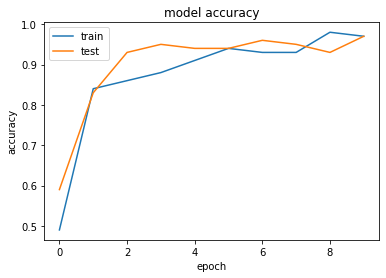

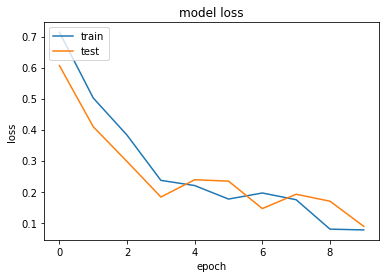

In [8]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


Covid


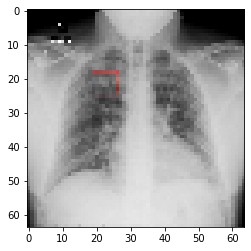

In [12]:
# for only one prediction
import numpy as np
from tensorflow.keras.preprocessing import image

test_image = image.load_img(r'G:\projects\corona x-ray images predication\Data\test\Covid\16672_1_1.jpg',target_size=(64, 64))
plt.imshow(test_image)
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
result = classifier.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
    prediction = 'Normal'
else:
    prediction = 'Covid'
print(prediction)


In [20]:
# plot confusion metrix
y_pred = []
y_test = []
import os

for i in os.listdir("G:/projects/corona x-ray images predication/Data/test/Normal"):
    img = image.load_img("G:/projects/corona x-ray images predication/Data/test/Normal/" + i, target_size=(64, 64))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    p = classifier.predict_classes(img)
    y_test.append(p[0, 0])
    y_pred.append(1)

for i in os.listdir("G:/projects/corona x-ray images predication/Data/test/Covid"):
    img = image.load_img("G:/projects/corona x-ray images predication/Data/test/Covid/" + i, target_size=(64, 64))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    p = classifier.predict_classes(img)
    y_test.append(p[0, 0])
    y_pred.append(0)

y_pred = np.array(y_pred)
y_test = np.array(y_test)

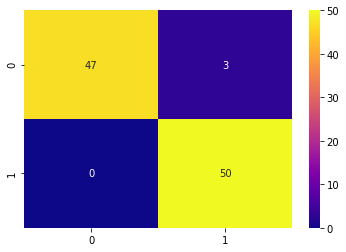

              precision    recall  f1-score   support

           0       1.00      0.94      0.97        50
           1       0.94      1.00      0.97        50

    accuracy                           0.97       100
   macro avg       0.97      0.97      0.97       100
weighted avg       0.97      0.97      0.97       100



In [21]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import classification_report

cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, cmap="plasma", annot=True)
plt.show()

print(classification_report(y_pred, y_test))
